# Registration stats

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<mark>Jump right into analyses from here:</mark>

[Counting values from individual registrations](#1)  
[Counting values from team registrations](#2)

## Individual registrations
<a id =1> </a>

<font color=#330099>Read in the csv from the repo</font>

In [2]:
individualDF = pd.read_csv("./data/CR_individual.csv", index_col="ID")

<font color=#330099>Some summary</font>

In [3]:
individualDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 60 to 217
Data columns (total 7 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Country                                                  204 non-null    object
 1   Academic discipline                                      186 non-null    object
 2   Career stage / position                                  186 non-null    object
 3   How did you find out about this workshop?                183 non-null    object
 4   Attendance/participation type                            204 non-null    object
 5   Stream only or also exercise group? Video or in-person?  204 non-null    object
 6   Which days you plan to attend?                           204 non-null    object
dtypes: object(7)
memory usage: 12.8+ KB


<font color=#330099>A closer look</font>

In [4]:
individualDF.head(5)

,Country,Academic discipline,Career stage / position,How did you find out about this workshop?,Attendance/participation type,Stream only or also exercise group? Video or in-person?,Which days you plan to attend?
ID,,,,,,,
60,Norway,Civil Engineering,Graduate student,Friend / Colleague,Learner,Watching stream and participate in online exer...,"Tue, Sep 20 (Day 1); Wed, Sep 21 (Day 2); Thu,..."
65,Norway,Basic Medicine,Postdoc,CodeRefinery.org,Learner,Watching stream and participate in online exer...,"Tue, Sep 20 (Day 1); Wed, Sep 21 (Day 2); Thu,..."
92,Norway,Other Engineering and Technologies,Graduate student,Friend / Colleague,Learner,Watching stream and participate in online exer...,"Tue, Sep 20 (Day 1); Wed, Sep 21 (Day 2); Thu,..."
232,Spain,Other Engineering and Technologies,Graduate student,Educational institute,Learner,I would like to get more information and decid...,"Tue, Sep 20 (Day 1); Wed, Sep 21 (Day 2); Thu,..."
17,Sweden,Mechanical Engineering,Researcher,CodeRefinery.org; Educational institute,Learner,Watching stream and participate in online exer...,"Tue, Sep 20 (Day 1); Wed, Sep 21 (Day 2); Thu,..."


<font color=#330099>Count some values</font>

In [5]:
individualDF.describe()

,Country,Academic discipline,Career stage / position,How did you find out about this workshop?,Attendance/participation type,Stream only or also exercise group? Video or in-person?,Which days you plan to attend?
count,204,186,186,183,204,204,204
unique,24,24,8,19,6,5,34
top,Finland,Computer and Information Sciences,Graduate student,Friend / Colleague,Learner,Only watching the stream,"Tue, Sep 20 (Day 1); Wed, Sep 21 (Day 2); Thu,..."
freq,61,31,72,67,185,90,117


In [7]:
countCountries = individualDF["Country"].value_counts()
countAcademic = individualDF["Academic discipline"].value_counts()
countCareer = individualDF["Career stage / position"].value_counts()
countFindOut = individualDF["How did you find out about this workshop?"].value_counts()
countAttendaceType1 = individualDF["Attendance/participation type"].value_counts()
countAttendaceType2 = individualDF["Stream only or also exercise group? Video or in-person?"].value_counts()
countAttendaceDays = individualDF["Which days you plan to attend?"].value_counts()

### Country

<font color=#330099>This can be plotted right away</font>

In [8]:
countCountries

Finland              61
Sweden               50
Norway               38
Spain                12
Denmark               7
Netherlands           5
India                 4
Switzerland           3
Italy                 3
United Kingdom        3
Ireland               3
United States         2
France                2
Brazil                1
Iran                  1
Trinidad & Tobago     1
Turkey                1
Greece                1
Indonesia             1
Canada                1
Germany               1
Thailand              1
Singapore             1
China                 1
Name: Country, dtype: int64

In [9]:
countCountries_DF = countCountries.reset_index()

<font color=#330099>Plot a histogram of registrants' countries</font>

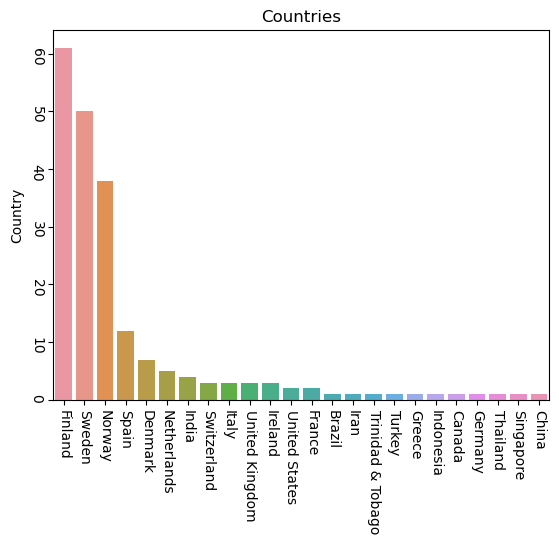

In [10]:
ax = sns.barplot(x=countCountries_DF.index, y=countCountries_DF.Country, data=countCountries_DF)
ax.set(title="Countries")
ax.set_xticklabels(countCountries.index)
ax.tick_params(labelrotation = 270)
plt.savefig("./plots/Registration_Countries.png",dpi=300, bbox_inches = "tight")

<font color=#330099>Calculate the sum of registrants</font>

In [11]:
countCountries.sum()

204

### Academic discipline

<font color=#330099>This can be plotted right away</font>

In [12]:
countAcademic_DF = countAcademic.reset_index()

In [13]:
countAcademic_DF

,index,Academic discipline
0,Computer and Information Sciences,31
1,Physical Sciences,28
2,Biological Sciences,22
3,Chemical Sciences,18
4,Earth and Related Environmental Sciences,15
5,"Electrical Engineering, Electronic Engineering...",14
6,Mechanical Engineering,13
7,Civil Engineering,8
8,Health Sciences,6
9,Mathematics,4


<font color=#330099>Plot a histogram of registrants' academic backgrounds</font>

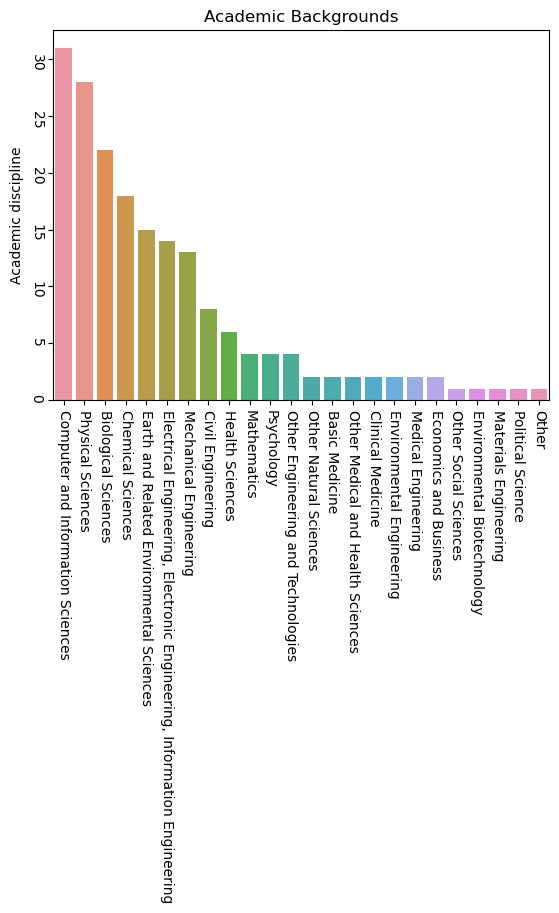

In [14]:
ax = sns.barplot(x=countAcademic_DF.index, y=countAcademic_DF["Academic discipline"], data=countAcademic_DF)
ax.set(title="Academic Backgrounds")
ax.set_xticklabels(countAcademic.index)
ax.tick_params(labelrotation = 270)
plt.savefig("./plots/Registration_Backgrounds.png",dpi=300, bbox_inches = "tight")

### Career stage / position

<font color=#330099>This can be plotted right away</font>

In [15]:
countCareer_DF = countCareer.reset_index()

In [16]:
countCareer_DF

,index,Career stage / position
0,Graduate student,72
1,Researcher,37
2,Postdoc,26
3,Research software engineer,17
4,Other,12
5,Professor,9
6,Industry,8
7,Undergrad. student,5


<font color=#330099>Plot a histogram of registrants' career stages</font>

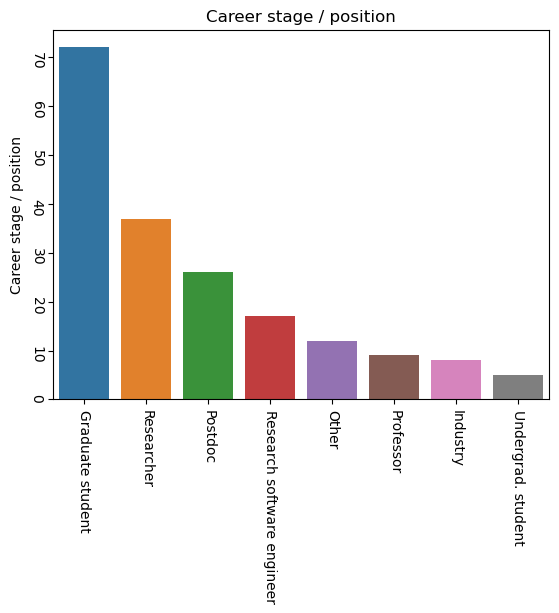

In [17]:
ax = sns.barplot(x=countCareer_DF.index, y=countCareer_DF["Career stage / position"], data=countCareer_DF)
ax.set(title="Career stage / position")
ax.set_xticklabels(countCareer.index)
ax.tick_params(labelrotation = 270)
plt.savefig("./plots/Registration_Career.png",dpi=300, bbox_inches = "tight")

### How did you find out about this workshop?

<font color=#ff0000>This needs some text analysis</font>

List all the different info sources occurring in the data

In [18]:
infoSources_list = ["Twitter","CodeRefinery.org","Educational institute","National HPC center","Friend / Colleague","Another event"]
infoSources = pd.Series(infoSources_list)

See that the beginning of the count values are valid

In [19]:
countFindOut[:6]

Friend / Colleague       67
Educational institute    34
CodeRefinery.org         19
National HPC center      18
Another event            15
Twitter                  15
Name: How did you find out about this workshop?, dtype: int64

This is the part that needs to be analysed

In [20]:
countFindOut[6:]

CodeRefinery.org; Educational institute                                              2
Educational institute; Friend / Colleague                                            2
National HPC center; Friend / Colleague                                              1
Twitter; Another event                                                               1
Friend / Colleague; Another event                                                    1
Educational institute; Another event                                                 1
Twitter; CodeRefinery.org; National HPC center; Friend / Colleague; Another event    1
CodeRefinery.org; Educational institute; Friend / Colleague                          1
Educational institute; National HPC center                                           1
CodeRefinery.org; National HPC center                                                1
Twitter; Educational institute; National HPC center                                  1
CodeRefinery.org; National HPC center; Frie

Select the part for analysis.  
Loop through info sources, inside loop:  
Loop through counted values and check if the info source is mentioned in the index. It if is then add the count to the corresponding point in the valid dataframe.

In [21]:
countFindOut_corrected = countFindOut[:6].copy(deep = True)

for source in infoSources_list:
    for index,count in zip(countFindOut.index[6:].values,countFindOut.values[6:]):
        if source in index:
#           print(source, index, count)
#           print(source,countFindOut_corrected[source])
            countFindOut_corrected[source] = countFindOut_corrected[source] + count

<font color=#330099>Plot a histogram of where the registrants found out about the workshop</font>

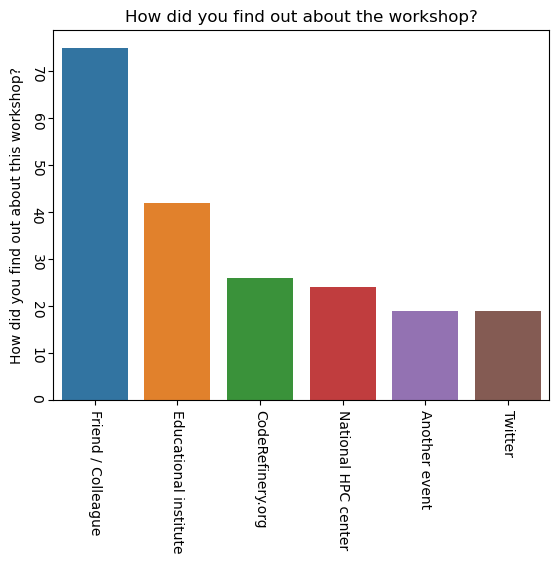

In [22]:
ax = sns.barplot(x=countFindOut_corrected.index, y=countFindOut_corrected)
ax.set(title="How did you find out about the workshop?")
ax.set_xticklabels(countFindOut_corrected.index.values)
ax.tick_params(labelrotation = 270)
plt.savefig("./plots/Registration_FindOut.png",dpi=300, bbox_inches = "tight")

### How did you find out about this workshop regardin the countries

<font color=#ff0000>Let's see how to do this..</font>

Select relevant columns from the original data

In [23]:
crossref1 = individualDF[["Country","How did you find out about this workshop?"]].copy(deep = True)

These are the sources of information again

In [24]:
infoSources_list

['Twitter',
 'CodeRefinery.org',
 'Educational institute',
 'National HPC center',
 'Friend / Colleague',
 'Another event']

Create more columns to the new dataframe. One for each info source.

In [25]:
for col in infoSources:
    crossref1[col] = np.nan

Fill NaN values with False.

In [26]:
crossref1.fillna(False, inplace=True)

See it works.

In [27]:
crossref1

,Country,How did you find out about this workshop?,Twitter,CodeRefinery.org,Educational institute,National HPC center,Friend / Colleague,Another event
ID,,,,,,,,
60,Norway,Friend / Colleague,False,False,False,False,False,False
65,Norway,CodeRefinery.org,False,False,False,False,False,False
92,Norway,Friend / Colleague,False,False,False,False,False,False
232,Spain,Educational institute,False,False,False,False,False,False
17,Sweden,CodeRefinery.org; Educational institute,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
52,Sweden,False,False,False,False,False,False,False
153,Finland,False,False,False,False,False,False,False
168,Finland,Educational institute,False,False,False,False,False,False


DEMO: one can see if the column contains a text (here the info sources)

In [28]:
crossref1["How did you find out about this workshop?"].str.contains("CodeRefinery").fillna(False).astype(int)

ID
60     0
65     1
92     0
232    0
17     1
      ..
52     0
153    0
168    0
29     0
217    0
Name: How did you find out about this workshop?, Length: 204, dtype: int64

Loop through rows in data and see if an info source is mentioned. Mark it to corresponding column. Then convert boolean to int.

In [29]:
for index in crossref1.index:
#    print(index)
    for info in infoSources_list:
#        print(index)
#        print(info)
        crossref1[info] = crossref1["How did you find out about this workshop?"].str.contains(info).fillna(False).astype(int)

Omit the column that contains the infosources cluttered.

In [30]:
crossref1.drop("How did you find out about this workshop?",axis=1,inplace=True)

See it works!

In [31]:
crossref1

,Country,Twitter,CodeRefinery.org,Educational institute,National HPC center,Friend / Colleague,Another event
ID,,,,,,,
60,Norway,0,0,0,0,1,0
65,Norway,0,1,0,0,0,0
92,Norway,0,0,0,0,1,0
232,Spain,0,0,1,0,0,0
17,Sweden,0,1,1,0,0,0
...,...,...,...,...,...,...,...
52,Sweden,0,0,0,0,0,0
153,Finland,0,0,0,0,0,0
168,Finland,0,0,1,0,0,0


Group the data by countries and calculate sums of info sources for each country.

In [32]:
info_by_Countries = crossref1.groupby("Country").sum()

See it works!

In [33]:
info_by_Countries

,Twitter,CodeRefinery.org,Educational institute,National HPC center,Friend / Colleague,Another event
Country,,,,,,
Brazil,0,0,0,0,1,0
Canada,0,0,0,0,0,1
China,0,0,0,0,0,0
Denmark,2,2,0,0,3,0
Finland,3,6,20,5,17,9
France,0,0,1,0,1,0
Germany,0,1,0,0,0,0
Greece,0,0,0,1,0,0
India,2,1,0,0,0,1


<font color=#330099>Plot a histogram of how registrants found out about the workshop grouped by countries</font>

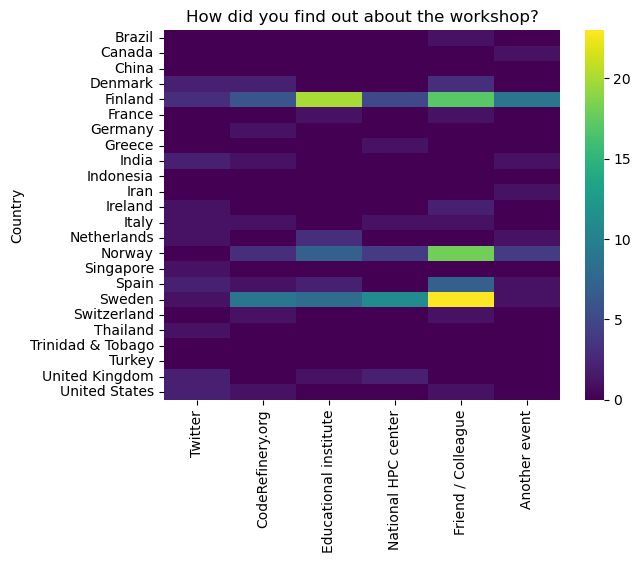

In [34]:
ax = sns.heatmap(info_by_Countries,cmap='viridis')
ax.set(title="How did you find out about the workshop?")
plt.savefig("./plots/Registration_FindOut_Countries.png",dpi=300, bbox_inches = "tight")

### Attendance/participation type

<font color=#330099>This can be plotted right away</font>

In [35]:
countAttendaceType1

Learner            185
Instructor           6
Observer             5
Expert helper        3
Organizer            3
Exercise leader      2
Name: Attendance/participation type, dtype: int64

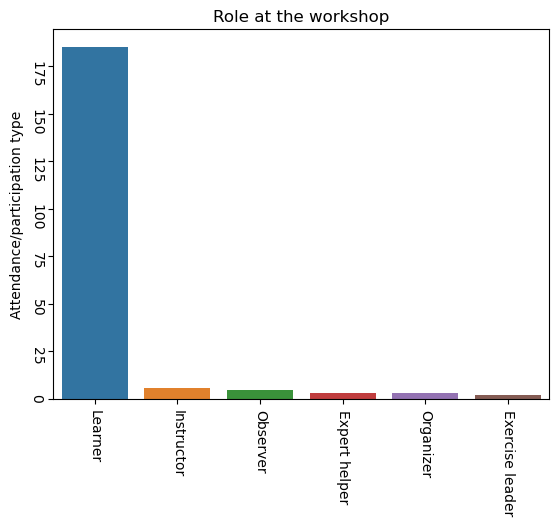

In [36]:
ax = sns.barplot(x=countAttendaceType1.index, y=countAttendaceType1)
ax.set(title="Role at the workshop")
ax.set_xticklabels(countAttendaceType1.index.values)
ax.tick_params(labelrotation = 270)
plt.savefig("./plots/Registration_Roles.png",dpi=300, bbox_inches = "tight")

### Stream only or also exercise group? Video or in-person?

<font color=#330099>This can be plotted right away</font>

In [37]:
countAttendaceType2

Only watching the stream                                                         90
Watching stream and participate in online exercise group (Code Refinery Zoom)    62
I would like to get more information and decide later                            29
I would like to watch and exercise with others in-person                         14
I am an organizer or instructor or observer                                       9
Name: Stream only or also exercise group? Video or in-person?, dtype: int64

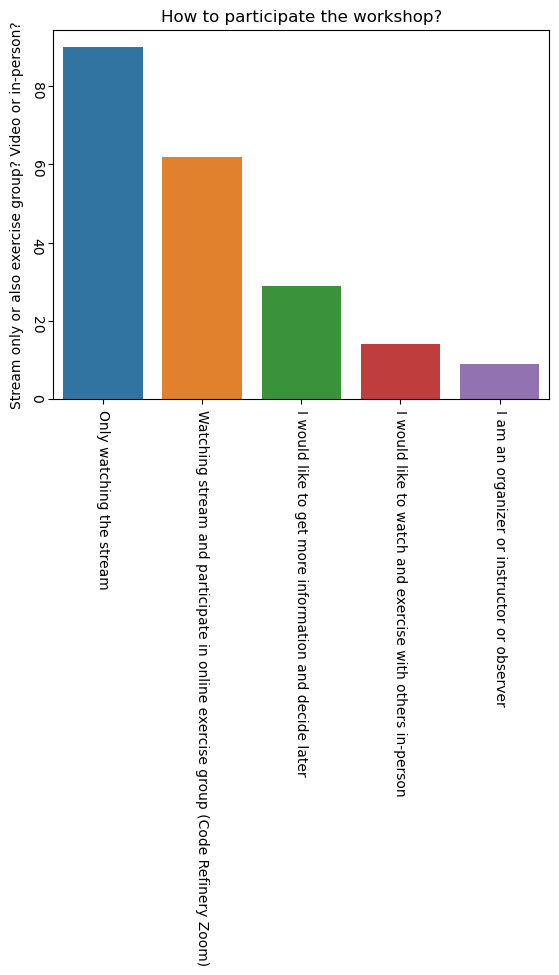

In [38]:
ax = sns.barplot(x=countAttendaceType2.index, y=countAttendaceType2)
ax.set(title="How to participate the workshop?")
ax.set_xticklabels(countAttendaceType2.index.values)
ax.tick_params(labelrotation = 270)
plt.savefig("./plots/Registration_Roles.png",dpi=300, bbox_inches = "tight")

### Which days you plan to attend?

<font color=#ff0000>This is tricky and potentially not worth it.</font>
> It would be nice to know if the days have some differences. Probably we get that from the Twitch stats also

In [39]:
days_list = ["Tue, Sep 20 (Day 1)", "Wed, Sep 21 (Day 2)", "Thu, Sep 22 (Day 3)", "Tue, Sep 27 (Day 4)", "Wed, Sep 28 (Day 5)", "Thu, Sep 29 (Day 6)", "Not sure I can attend, but please keep me informed"]

In [40]:
for i in days_list:
    print(i)

Tue, Sep 20 (Day 1)
Wed, Sep 21 (Day 2)
Thu, Sep 22 (Day 3)
Tue, Sep 27 (Day 4)
Wed, Sep 28 (Day 5)
Thu, Sep 29 (Day 6)
Not sure I can attend, but please keep me informed


In [41]:
countAttendanceDays_corrected = pd.Series([x for x in range(len(days_list))])
countAttendanceDays_corrected.index = days_list

for day in days_list:
    for index,count in zip(countAttendaceDays.index.values,countAttendaceDays.values):
        if day in index:
#           print(day,"|||", index, count)
            countAttendanceDays_corrected[day] = countAttendanceDays_corrected[day] + count

In [42]:
countAttendanceDays_corrected

Tue, Sep 20 (Day 1)                                   162
Wed, Sep 21 (Day 2)                                   166
Thu, Sep 22 (Day 3)                                   164
Tue, Sep 27 (Day 4)                                   168
Wed, Sep 28 (Day 5)                                   163
Thu, Sep 29 (Day 6)                                   170
Not sure I can attend, but please keep me informed     44
dtype: int64

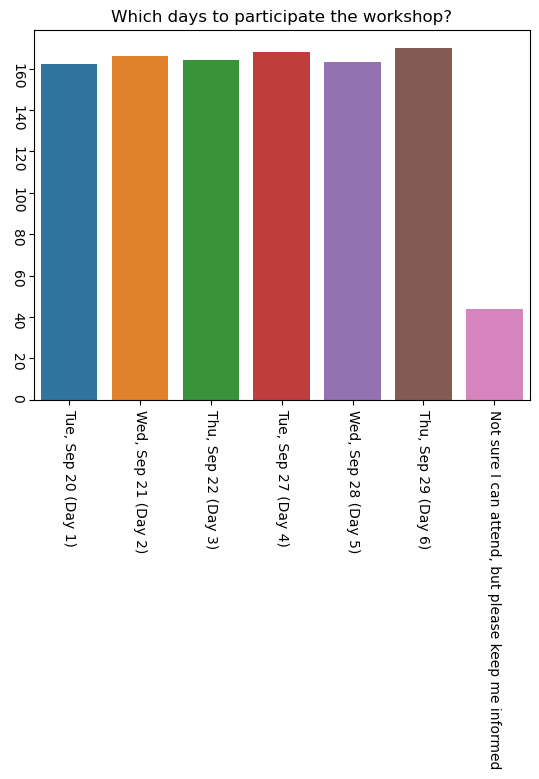

In [43]:
ax = sns.barplot(x=countAttendanceDays_corrected.index, y=countAttendanceDays_corrected)
ax.set(title="Which days to participate the workshop?")
ax.set_xticklabels(countAttendanceDays_corrected.index.values)
ax.tick_params(labelrotation = 270)
plt.savefig("./plots/Registration_Days.png",dpi=300, bbox_inches = "tight")

## Team registrations
<a id =2> </a>

<font color=#330099>Read in the csv from the repo</font>

In [44]:
teamDF = pd.read_csv("./data/CR_teams.csv", index_col="ID")

<font color=#330099>Some summary</font>

In [45]:
teamDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 67 to 45
Data columns (total 7 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Actual number of teams                                               7 non-null      float64
 1   Actual number of learners                                            7 non-null      float64
 2   Actual number of exercise leads                                      7 non-null      float64
 3   Country/countries that learners are affilated with                   7 non-null      object 
 4   Career stage/ position of learners                                   7 non-null      object 
 5   Academic discipline                                                  6 non-null      object 
 6   Academic disciplines (if multiple teams from different disciplines)  3 non-null      object 
dtypes: float64(

<font color=#330099>A closer look</font>

In [46]:
teamDF

,Actual number of teams,Actual number of learners,Actual number of exercise leads,Country/countries that learners are affilated with,Career stage/ position of learners,Academic discipline,Academic disciplines (if multiple teams from different disciplines)
ID,,,,,,,
67,2.0,12.0,2.0,Norway,9 PhDs / 2 postdoc / 1 researcher,Mixed,Process Engineering: 7 / physics: 1 / Architec...
75,1.0,2.0,1.0,Sweden,1 PhD student and 1 postdoc,Biological Sciences,NaN
253,1.0,4.0,2.0,Finland,"Industry: 10, Undergraduate: 1",Computer and Information Sciences,NaN
41,4.0,19.0,5.0,TU Delft: 19,"PhD candidate: 17, Researcher: 2",Mixed,"Civil Engineering: 5, Computer and Information..."
42,1.0,11.0,2.0,Finland,6 Doctoral researcher 4 Masters student ...,NaN,"Chemical Sciences: 2, Computer and Information..."
134,1.0,5.0,2.0,The Netherlands: 5,PhD student: 3 PostDoc: 1 emeriti: 1,Mixed,NaN
135,1.0,5.0,2.0,Netherlands,Mostly Phds and a professor. Number of learner...,Mixed,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color=#330099>Count some values</font>

In [47]:
countActualTeams_team = teamDF["Actual number of teams"].value_counts()
countActualLearners_team = teamDF["Actual number of learners"].value_counts()
countActualELs_team = teamDF["Actual number of exercise leads"].value_counts()

In [48]:
countActualTeams_team

1.0    5
2.0    1
4.0    1
Name: Actual number of teams, dtype: int64

In [49]:
countActualLearners_team

5.0     2
12.0    1
2.0     1
4.0     1
19.0    1
11.0    1
Name: Actual number of learners, dtype: int64

In [50]:
countActualELs_team

2.0    5
1.0    1
5.0    1
Name: Actual number of exercise leads, dtype: int64

In [51]:
teamDF["Actual number of teams"].sum()

11.0

In [52]:
teamDF["Actual number of learners"].sum()

58.0

THE COUNTRY COUNTS SHOULD TAKE THESE INTO ACCOUNT